# Imports

In [4]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from keras.layers import Conv1D
from keras.models import Model, Sequential
from numpy import array
from numpy import argmax
from keras.utils import to_categorical
!pip install conv
from conv import convolved
from keras.layers import Conv1D, Dense, Flatten, Dropout, Input, Concatenate, GlobalMaxPooling1D, MaxPooling1D, GlobalAveragePooling1D, Reshape, UpSampling1D

# Import file

In [5]:
# import file
data = pd.read_csv('emg_final.csv')
# print shape
print(data.shape)

(57764, 10)


(57764, 10)


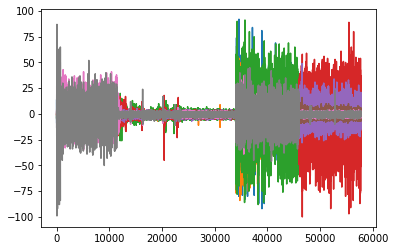

In [6]:
# convert to array and print shape
data_array = data.to_numpy()
print(data_array.shape)

# remove timestamp row and print shape
data_array = data_array[:, 1:]

# plot data
plt.plot(data_array[:,:-1])

# Divide data into x and y


In [7]:
# set x_values as input and confirm shape/entry
x_values = data_array[:, 0:8]
print(x_values.shape)
print(x_values[0:3])

(57764, 8)
[[ -3  -1  -3   0   2  -1   0 -13]
 [ -4  -1   2   1  -1   2  -3   1]
 [ -3   1   1   0  -2   0  -4   8]]


In [8]:
# do y_values
y_values = data_array[:, 8]
print(y_values.shape)
print(y_values[57000])

(57764,)
5


# Make it into batches

In [9]:
# define a list, add convolved to it, make that an array
kernel_array = []
for kernel_hover in convolved(x_values, kernel_size = 200):
  kernel_array.append(kernel_hover)
kernel_array = np.array(kernel_array)
print(kernel_array.shape)
print(kernel_array)

(57565, 200, 8)
[[[ -3  -1  -3 ...  -1   0 -13]
  [ -4  -1   2 ...   2  -3   1]
  [ -3   1   1 ...   0  -4   8]
  ...
  [ -2  -2   0 ...   4   0  -6]
  [ -2  -1  -1 ...  -1   5  -3]
  [ -3  -3   0 ...  -2   3   2]]

 [[ -4  -1   2 ...   2  -3   1]
  [ -3   1   1 ...   0  -4   8]
  [ 14   0  -5 ...  -1   1   7]
  ...
  [ -2  -1  -1 ...  -1   5  -3]
  [ -3  -3   0 ...  -2   3   2]
  [  1   3  -1 ...  -3  -5 -10]]

 [[ -3   1   1 ...   0  -4   8]
  [ 14   0  -5 ...  -1   1   7]
  [ -8   0   1 ...  -1   2  -6]
  ...
  [ -3  -3   0 ...  -2   3   2]
  [  1   3  -1 ...  -3  -5 -10]
  [ -2   0  -1 ...  -1   4  -1]]

 ...

 [[  1  -1 -12 ...  -1   0   0]
  [  1   2  23 ...  -1   1   1]
  [ -4  -2 -11 ...   0   0  -3]
  ...
  [ -2   3  14 ...  -1  -2  -2]
  [ -1   1   9 ...  -3  -1   0]
  [  1  -1 -14 ...   1  -2   1]]

 [[  1   2  23 ...  -1   1   1]
  [ -4  -2 -11 ...   0   0  -3]
  [  1   4   9 ...   1   0  -2]
  ...
  [ -1   1   9 ...  -3  -1   0]
  [  1  -1 -14 ...   1  -2   1]
  [  1  -1  

In [10]:
print(np.amin(kernel_array))

-100


In [11]:
a = kernel_array/100
print(np.amin(a))
# kernel_array = a

-1.0


In [12]:
# make y values match
y = y_values[199:]
print(y.shape)

(57565,)


# y to_categorical

In [13]:
# make y_values categorical

# empty list
y_cat = []

# loop that sets each row of y_cat equal to a categorical array 
for i in y:
  zeros = np.array([0,0,0,0,0,0])
  zeros[i]=1
  y_cat.append(zeros)
y_cat = np.array(y_cat)
print(y_cat)
print(y_cat.shape)

[[0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]
(57565, 6)


# CNN

In [14]:
from keras import optimizers

model = Sequential()
model.add(Conv1D(64,3, activation='relu', input_shape=(200,8)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 198, 64)           1600      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 64)           12352     
_________________________________________________________________
dropout_1 (Dropout)          (None, 196, 64)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300   

In [0]:
import json

json_string = model.to_json()

with open('data.json', 'w') as f:
    json.dump(json_string, f)

In [0]:
history = model.fit(kernel_array, y_cat, epochs=50,validation_split=0.2, verbose=1, shuffle=True)

Train on 46052 samples, validate on 11513 samples
Epoch 1/50
46052/46052 [==============================] - 15s 329us/step - loss: 0.0042 - acc: 0.9991 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/50
46052/46052 [==============================] - 15s 317us/step - loss: 0.0063 - acc: 0.9988 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/50
46052/46052 [==============================] - 15s 324us/step - loss: 0.0126 - acc: 0.9983 - val_loss: 0.0011 - val_acc: 0.9997
Epoch 4/50
46052/46052 [==============================] - 14s 311us/step - loss: 0.0129 - acc: 0.9988 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/50
46052/46052 [==============================] - 14s 314us/step - loss: 0.0109 - acc: 0.9987 - val_loss: 0.3183 - val_acc: 0.9742
Epoch 6/50
46052/46052 [==============================] - 15s 322us/step - loss: 0.0040 - acc: 0.9995 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/50
46052/46052 [==============================] - 15s 316us/step - loss: 0.0029 - acc: 0.999

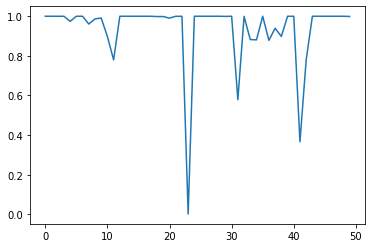

In [0]:
plt.plot(history.history['val_acc'])
model.save_weights('model_normalized2.h5')

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving emg-Tue Oct  1 14:54:00 2019
.csv to emg-Tue Oct  1 14:54:00 2019
.csv
User uploaded file "emg-Tue Oct  1 14:54:00 2019
.csv" with length 56157 bytes


In [0]:
test = pd.read_csv(fn)
test_array = test.to_numpy()
test_array = test_array[:, 1:]
if test_array.shape[1] == 9:
  test_array = test_array[:, :-1]
# print(test_array.shape)
# print(test_array)
testarray = []
for thing in convolved(test_array, kernel_size = 200):
  testarray.append(thing)
testarray = np.array(testarray)
# print(testarray.shape)
d = model.predict(testarray[:, :])[0]
e = np.amax(d)
r = d.tolist().index(e)
def f(x):
    return {
        0 : 'null',
        1 : 'down',
        2 : 'left',
        3 : 'rest',
        4 : 'right',
        5 : 'up',
    }[x]
print("Prediction = " + f(r))

Prediction = right
